# Customer Churn Prediction


## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing the dataset


In [2]:
dataset_train = pd.read_csv('churn-80.csv')
dataset_test = pd.read_csv('churn-20.csv')

In [3]:
dataset_train


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [4]:
dataset_test

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [5]:
dataset = dataset_train.append(dataset_test)

In [6]:
dataset

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


## Dataset Overview

In [7]:
rows=dataset.shape[0]
features=dataset.shape[1]-1
mv=dataset.isnull().sum().values.sum()
print('No. of examples:', rows)
print('No. of features:', features)
print('No. of missing values:', mv)

No. of examples: 3333
No. of features: 19
No. of missing values: 0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   f

## Visualisations

<AxesSubplot:xlabel='Churn', ylabel='count'>

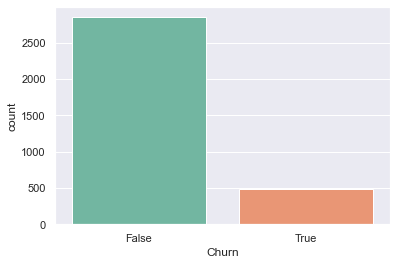

In [9]:
sns.set_theme(style="darkgrid")
sns.countplot(data=dataset, x = 'Churn', palette= 'Set2')

Data is imbalanced i.e. much more false values than true values

Text(0.5, 1.0, 'Count per State')

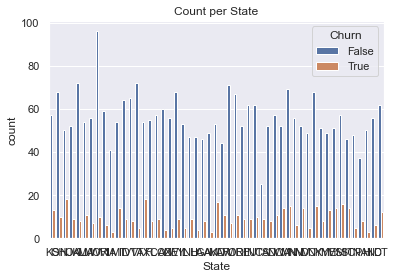

In [10]:
sns.countplot(x = 'State', hue = 'Churn' , data = dataset)
plt.title('Count per State')

Top 3 States with high Churn are: NJ, TX, MD

Text(0.5, 1.0, 'Count per Area')

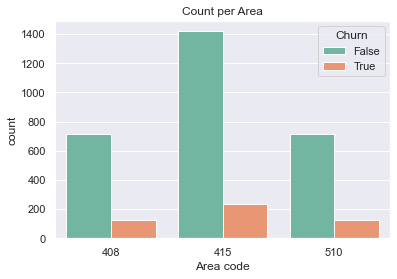

In [11]:
sns.countplot(data=dataset, x='Area code',hue= 'Churn',palette = 'Set2')
plt.title('Count per Area')


There is more churn in Area Code: 415

Text(0.5, 1.0, 'Voice mail and International plan churn')

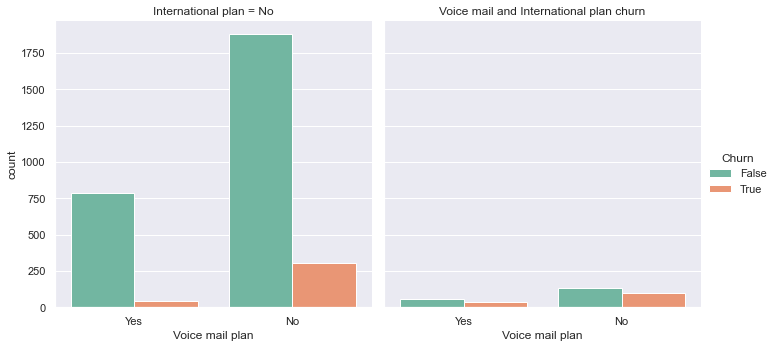

In [12]:
sns.catplot(x="Voice mail plan", col= 'International plan', data=dataset, hue = 'Churn', palette= 'Set2', kind="count")
plt.title('Voice mail and International plan churn')

Churn rate is significantly higher in customers with no International and voice mail plan

Text(0.5, 1.0, 'No. of Customer service calls')

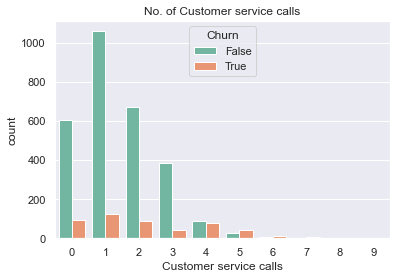

In [13]:
sns.countplot(data=dataset, x='Customer service calls', hue = 'Churn', palette = 'Set2')
plt.title('No. of Customer service calls')

Text(0.5, 1.0, 'Heatmap of data')

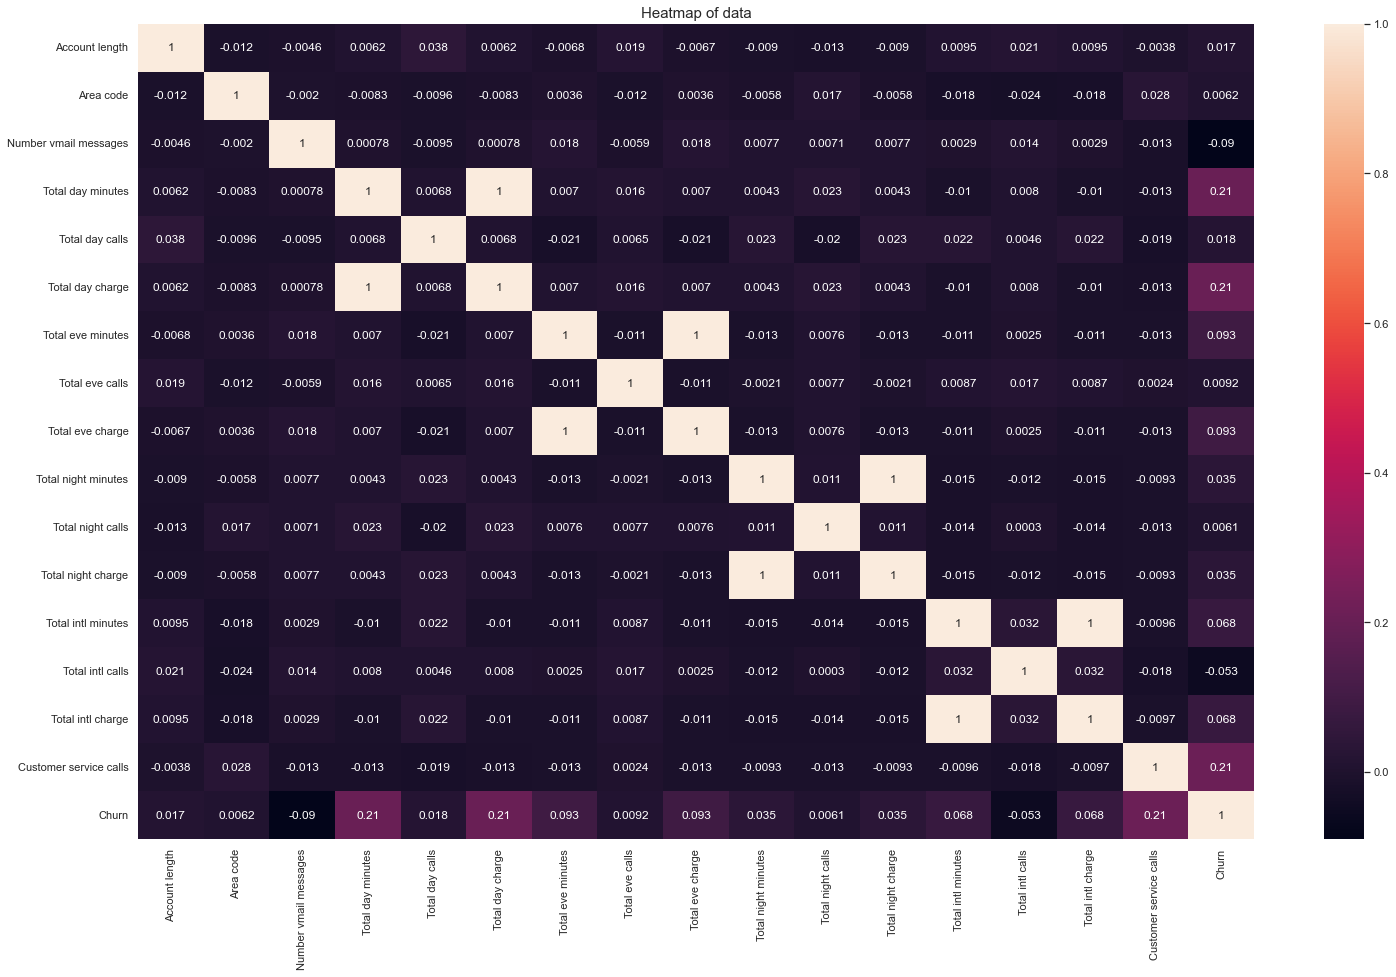

In [14]:
plt.rcParams["figure.figsize"] = (25,15)
sns.heatmap(dataset[:].corr(),annot = True)
plt.title("Heatmap of data",fontsize= 15)

# Handling categorical features

In [15]:
dataset['International plan']=dataset['International plan'].map({'No':0,'Yes':1})
dataset['Voice mail plan']=dataset['Voice mail plan'].map({'No':0,'Yes':1})
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [16]:
dataset['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

## Label Encoding the "State" & "Area Code" column

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['State'] = le.fit_transform(dataset['State'])
dataset['Area code'] = le.fit_transform(dataset['Area code'])

In [18]:
dataset

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,48,114,1,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,1,106,0,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,46,60,1,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,49,159,1,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [19]:
X= dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression classifier on the Imbalanced Training set

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predicting the Test set results

In [23]:
lr_cal = lr.predict(X_test)
print(np.concatenate((lr_cal.reshape(len(lr_cal),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [False False]
 ...
 [False False]
 [False False]
 [False False]]


### Making the confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix
confM = confusion_matrix(y_test, lr_cal)
print(confM)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_cal)

[[560  14]
 [ 74  19]]


0.8680659670164917

### Results of imbalanced dataset using Logistic Regression

In [25]:
from sklearn.metrics import f1_score, classification_report
print(classification_report(y_test, lr_cal))

              precision    recall  f1-score   support

       False       0.88      0.98      0.93       574
        True       0.58      0.20      0.30        93

    accuracy                           0.87       667
   macro avg       0.73      0.59      0.61       667
weighted avg       0.84      0.87      0.84       667



Precision and Recall are low for the given logistic regression model using imbalanced data

# Balancing dataset using SMOTETomek

In [26]:
from imblearn.combine import SMOTETomek
sm=SMOTETomek(random_state=0)
X_train_ns,y_train_ns=sm.fit_resample(X_train,y_train)
y_train_ns.shape

(4552,)

<AxesSubplot:ylabel='count'>

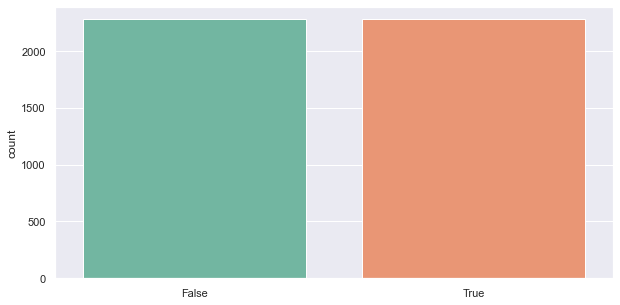

In [27]:
plt.rcParams["figure.figsize"] = (10,5)
sns.countplot(y_train_ns, palette= 'Set2')

Data is balanced now using SMOTETomek and it contains 4552 examples

## Training the Logistic Regression classifier on the Balanced Training set

In [28]:
lr_b = LogisticRegression(random_state = 0)
lr_b.fit(X_train_ns, y_train_ns)

LogisticRegression(random_state=0)

### Predicting the Test set results

In [29]:
lr_b_cal = lr_b.predict(X_test)
print(np.concatenate((lr_b_cal.reshape(len(lr_b_cal),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [False False]
 ...
 [False False]
 [False False]
 [False False]]


### Making the confusion matrix

In [30]:
confM = confusion_matrix(y_test, lr_b_cal)
print(confM)
accuracy_score(y_test, lr_b_cal)

[[463 111]
 [ 16  77]]


0.8095952023988006

### Results of balanced dataset using Logistic Regression

In [31]:
print(classification_report(y_test, lr_b_cal))

              precision    recall  f1-score   support

       False       0.97      0.81      0.88       574
        True       0.41      0.83      0.55        93

    accuracy                           0.81       667
   macro avg       0.69      0.82      0.71       667
weighted avg       0.89      0.81      0.83       667



# SVM Classifier

## Training the SVM classifier on the Imbalanced Training set

In [32]:
from sklearn.svm import SVC
svc = SVC(random_state = 0)
svc.fit(X_train, y_train)

SVC(random_state=0)

### Predicting the Test set results

In [33]:
svc_cal = svc.predict(X_test)
print(np.concatenate((svc_cal.reshape(len(svc_cal),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [False False]
 ...
 [False False]
 [False False]
 [False False]]


### Making the confusion matrix

In [34]:
confM = confusion_matrix(y_test, svc_cal)
print(confM)
accuracy_score(y_test, svc_cal)

[[572   2]
 [ 44  49]]


0.9310344827586207

### Results of imbalanced dataset using SVM classifier

In [35]:
print(classification_report(y_test, svc_cal))

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       574
        True       0.96      0.53      0.68        93

    accuracy                           0.93       667
   macro avg       0.94      0.76      0.82       667
weighted avg       0.93      0.93      0.92       667



## Training the SVM classifier on the Balanced Training set

In [36]:
svc_b = SVC(random_state = 0)
svc_b.fit(X_train_ns, y_train_ns)

SVC(random_state=0)

### Predicting the Test set results

In [37]:
svc_b_cal = svc_b.predict(X_test)
print(np.concatenate((svc_b_cal.reshape(len(svc_b_cal),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [False False]
 ...
 [False False]
 [False False]
 [False False]]


### Making the confusion matrix

In [38]:
confM = confusion_matrix(y_test, svc_b_cal)
print(confM)
accuracy_score(y_test, svc_b_cal)

[[537  37]
 [ 23  70]]


0.9100449775112444

### Results of balanced dataset using SVM classifier

In [39]:
print(classification_report(y_test, svc_b_cal))

              precision    recall  f1-score   support

       False       0.96      0.94      0.95       574
        True       0.65      0.75      0.70        93

    accuracy                           0.91       667
   macro avg       0.81      0.84      0.82       667
weighted avg       0.92      0.91      0.91       667



# Random Forest

## Training the Random Forest classifier on the Imbalanced Training set

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Predicting the Test set results

In [41]:
rfc_cal = rfc.predict(X_test)
print(np.concatenate((rfc_cal.reshape(len(rfc_cal),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [False False]
 ...
 [False False]
 [False False]
 [False False]]


### Making the confusion matrix


In [42]:
confM = confusion_matrix(y_test, rfc_cal)
print(confM)
accuracy_score(y_test, rfc_cal)

[[574   0]
 [ 26  67]]


0.9610194902548725

### Results of imbalanced dataset using Random Forest classifier

In [43]:
print(classification_report(y_test, rfc_cal))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98       574
        True       1.00      0.72      0.84        93

    accuracy                           0.96       667
   macro avg       0.98      0.86      0.91       667
weighted avg       0.96      0.96      0.96       667



## Training the Random Forest classifier on the Balanced Training set

In [44]:
rfc_b = RandomForestClassifier(random_state = 0)
rfc_b.fit(X_train_ns, y_train_ns)

RandomForestClassifier(random_state=0)

### Predicting the Test set results

In [45]:
rfc_b_cal = rfc_b.predict(X_test)
print(np.concatenate((rfc_b_cal.reshape(len(rfc_b_cal),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [False False]
 ...
 [False False]
 [False False]
 [False False]]


### Making the confusion matrix

In [46]:
confM = confusion_matrix(y_test, rfc_b_cal)
print(confM)
accuracy_score(y_test, rfc_b_cal)

[[563  11]
 [ 18  75]]


0.9565217391304348

### Results of balanced dataset using Random Forest classifier

In [47]:
print(classification_report(y_test, rfc_b_cal))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       574
        True       0.87      0.81      0.84        93

    accuracy                           0.96       667
   macro avg       0.92      0.89      0.91       667
weighted avg       0.96      0.96      0.96       667



## Training the XGBoost on the Imbalanced Training set

In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Predicting the Test set results

In [49]:
xgb_cal = xgb.predict(X_test)
print(np.concatenate((xgb_cal.reshape(len(xgb_cal),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the confusion matrix

In [50]:
confM = confusion_matrix(y_test, xgb_cal)
print(confM)
accuracy_score(y_test, xgb_cal)

[[568   6]
 [ 22  71]]


0.9580209895052474

### Results of imbalanced dataset using XGBoost

In [51]:
print(classification_report(y_test, xgb_cal))

              precision    recall  f1-score   support

       False       0.96      0.99      0.98       574
        True       0.92      0.76      0.84        93

    accuracy                           0.96       667
   macro avg       0.94      0.88      0.91       667
weighted avg       0.96      0.96      0.96       667



## Training the XGBoost on the Imbalanced Training set

In [52]:
from xgboost import XGBClassifier
xgb_b = XGBClassifier()
xgb_b.fit(X_train_ns, y_train_ns)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Predicting the Test set results

In [53]:
xgb_b_cal = xgb_b.predict(X_test)
print(np.concatenate((xgb_b_cal.reshape(len(xgb_b_cal),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the confusion matrix

In [54]:
confM = confusion_matrix(y_test, xgb_b_cal)
print(confM)
accuracy_score(y_test, xgb_b_cal)

[[564  10]
 [ 18  75]]


0.9580209895052474

### Results of balanced dataset using XGBoost

In [55]:
print(classification_report(y_test, xgb_b_cal))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98       574
        True       0.88      0.81      0.84        93

    accuracy                           0.96       667
   macro avg       0.93      0.89      0.91       667
weighted avg       0.96      0.96      0.96       667

